In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [147]:
data = pd.read_excel('data.xlsx')

In [148]:
print("Columns in the Excel file:")
print(data.columns)
print("---------------------------------------------------------------")
print(data.info())
print("---------------------------------------------------------------")
print(data.nunique())
print("---------------------------------------------------------------")
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Columns in the Excel file:
Index(['Timestamp', 'age', 'gender', 'edu levele', 'job', 'curr smoking',
       'age st', 'count', 'giveup', 'relative smokers ', 'reasons', 'Gender',
       'Edu level', 'Curr smoking', 'Giveup', 'Job', 'Relative smokers'],
      dtype='object')
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          329 non-null    datetime64[ns]
 1   age                329 non-null    object        
 2   gender             329 non-null    object        
 3   edu levele         329 non-null    object        
 4   job                329 non-null    object        
 5   curr smoking       329 non-null    object        
 6   age st             329 non-null    int64         
 7   count              329 non-null    int64         
 8   g

In [149]:
data['age'] = data['age'].apply(convert_age_range_to_numeric)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Timestamp            0
age                  0
gender               0
edu levele           0
job                  0
curr smoking         0
age st               0
count                0
giveup               0
relative smokers     0
reasons              0
Gender               0
Edu level            0
Curr smoking         0
Giveup               0
Job                  0
Relative smokers     0
dtype: int64


In [150]:
def plot_column(data, column):
    plt.figure(figsize=(6,4))
    if pd.api.types.is_numeric_dtype(data[column]):
        # For numerical columns, create a histogram
        data[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
        plt.title('Histogram of {}'.format(column))
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
    else:
        # For categorical columns, create a bar plot
        data[column].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
        plt.title('Bar Plot of {}'.format(column))
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.grid(axis='y')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


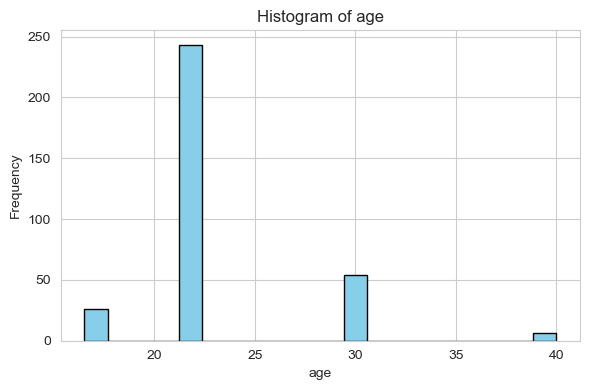

age
22.0    243
30.0     54
16.5     26
40.0      6
Name: count, dtype: int64


In [151]:

plot_column(data,'age')

print(data['age'].value_counts())


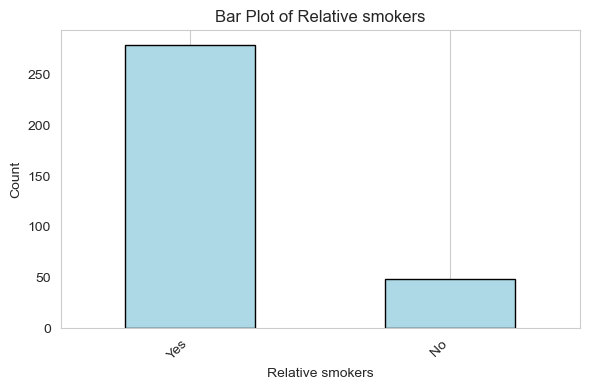

Relative smokers
Yes    280
No      49
Name: count, dtype: int64


In [152]:

plot_column(data,'Relative smokers')

print(data['Relative smokers'].value_counts())


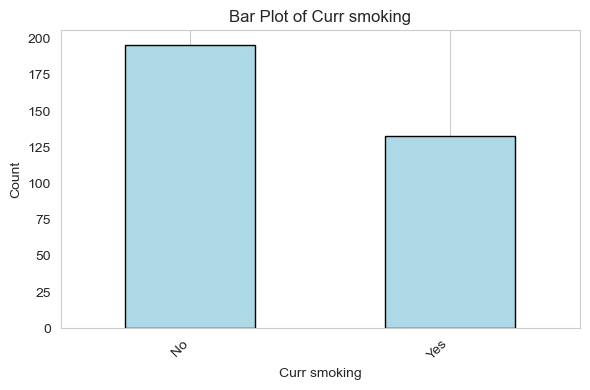

Curr smoking
No     196
Yes    133
Name: count, dtype: int64


In [153]:

plot_column(data,'Curr smoking')

print(data['Curr smoking'].value_counts())


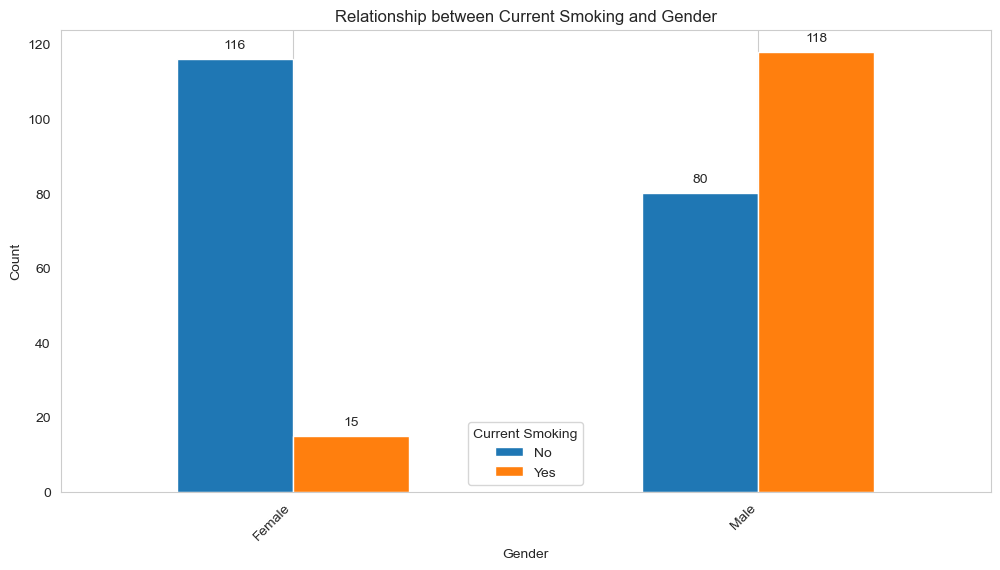

In [154]:

grouped_data = data.groupby(['Gender', 'Curr smoking']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', figsize=(12, 6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Relationship between Current Smoking and Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Current Smoking')
plt.grid(axis='y')
plt.show()


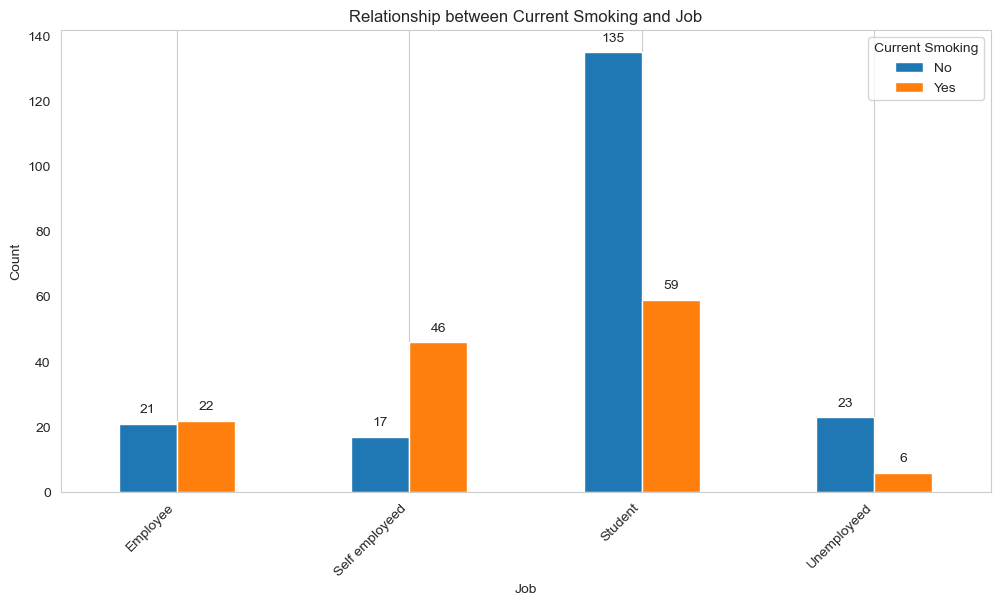

In [155]:

grouped_data = data.groupby(['Job', 'Curr smoking']).size().unstack(fill_value=0)

# Plot a grouped bar plot
ax = grouped_data.plot(kind='bar', figsize=(12, 6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Relationship between Current Smoking and Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Current Smoking')
plt.grid(axis='y')
plt.show()


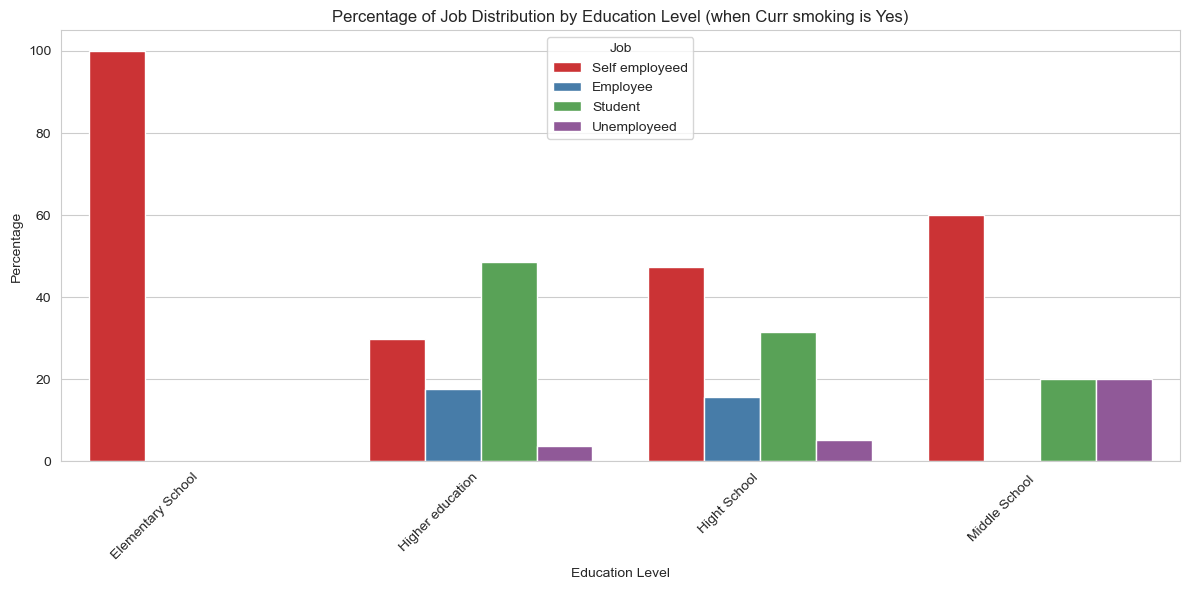

In [156]:

yes_curr_smoking_data = data[data['Curr smoking'] == 'Yes']


percentage_data = yes_curr_smoking_data.groupby(['Edu level', 'Job']).size() / yes_curr_smoking_data.groupby('Edu level').size() * 100
percentage_data = percentage_data.reset_index(name='Percentage')


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_data, x='Edu level', y='Percentage', hue='Job', palette='Set1')

plt.title('Percentage of Job Distribution by Education Level (when Curr smoking is Yes)')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Job')
plt.tight_layout()

plt.show()



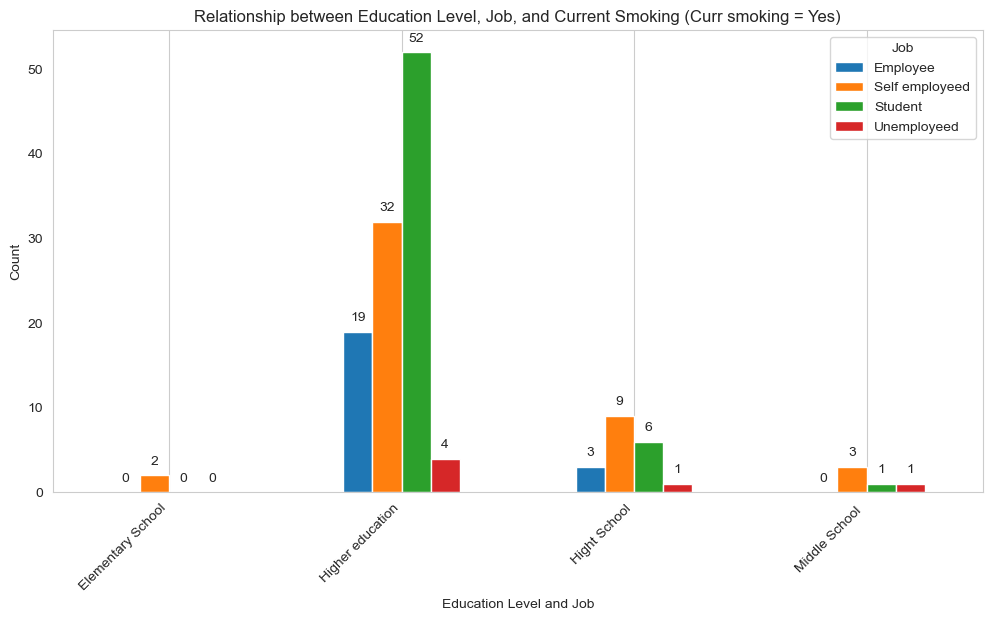

In [157]:
# Filter the data for rows where 'Curr smoking' is 'Yes'
smoking_yes_data = data[data['Curr smoking'] == 'Yes']

grouped_data = smoking_yes_data.groupby(['Edu level', 'Job']).size().unstack(fill_value=0)


ax = grouped_data.plot(kind='bar', figsize=(12, 6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Relationship between Education Level, Job, and Current Smoking (Curr smoking = Yes)')
plt.xlabel('Education Level and Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job')
plt.grid(axis='y')
plt.show()


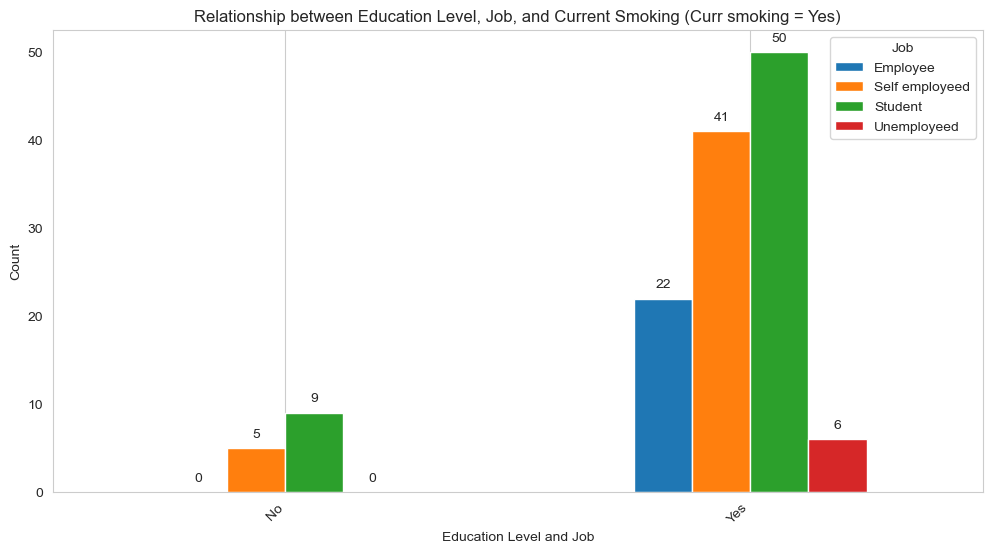

In [158]:

smoking_yes_data = data[data['Curr smoking'] == 'Yes']

grouped_data = smoking_yes_data.groupby(['Relative smokers', 'Job']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', figsize=(12, 6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Relationship between Education Level, Job, and Current Smoking (Curr smoking = Yes)')
plt.xlabel('Education Level and Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job')
plt.grid(axis='y')
plt.show()


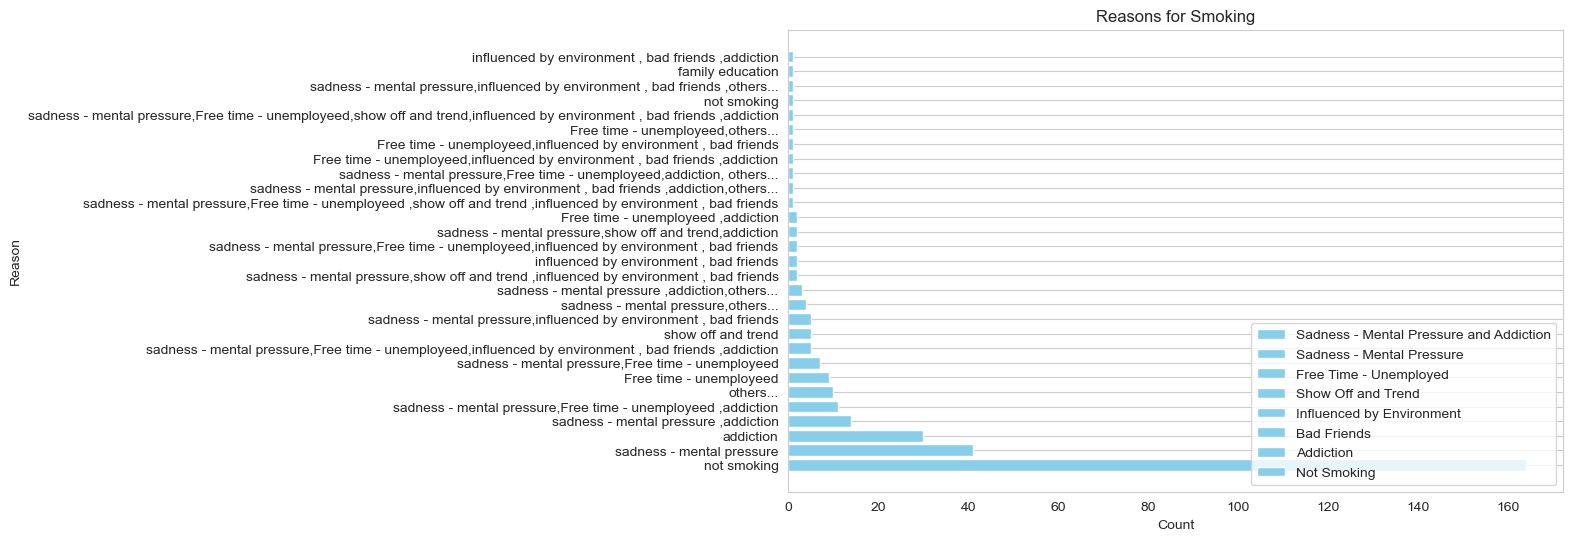

In [159]:

#reason
custom_labels = {
    'sadness - mental pressure, addiction': 'Sadness - Mental Pressure and Addiction',
    'sadness - mental pressure': 'Sadness - Mental Pressure',
    'Free time - unemployeed': 'Free Time - Unemployed',
    'show off and trend': 'Show Off and Trend',
    'influenced by environment': 'Influenced by Environment',
    'bad friends': 'Bad Friends',
    'addiction': 'Addiction',
    'not smoking': 'Not Smoking'
}

reason_counts = data['reasons'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(reason_counts.index, reason_counts.values, color='skyblue')


ax.legend(bars, custom_labels.values(), loc='lower right')
ax.set_title('Reasons for Smoking')
ax.set_xlabel('Count')
ax.set_ylabel('Reason')
ax.grid(axis='x')

plt.show()

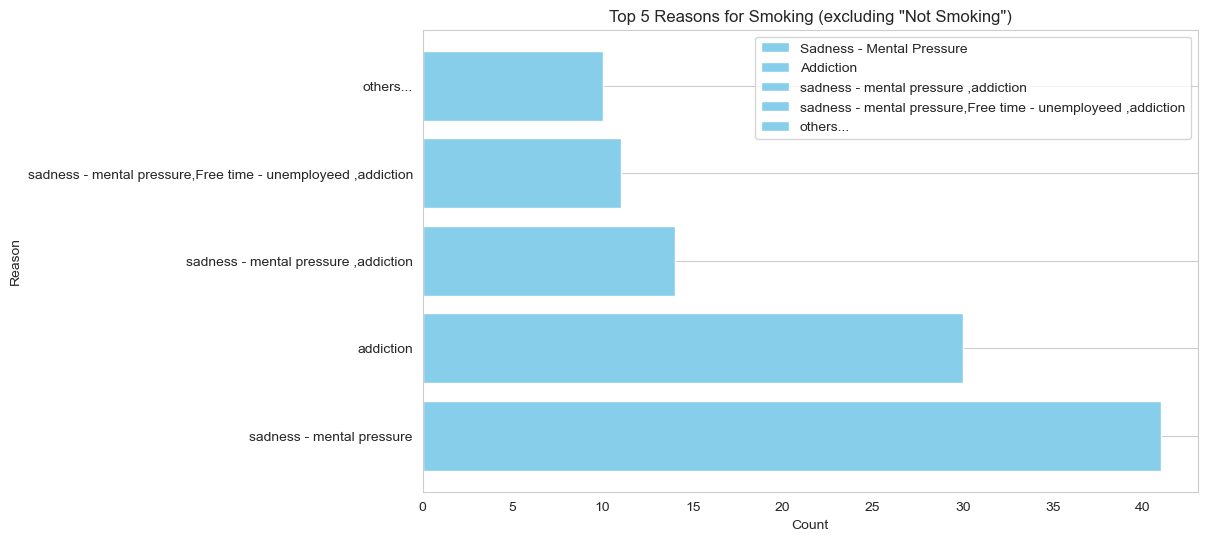

In [160]:
import matplotlib.pyplot as plt


custom_labels = {
    'sadness - mental pressure, addiction': 'Sadness - Mental Pressure and Addiction',
    'sadness - mental pressure': 'Sadness - Mental Pressure',
    'Free time - unemployeed': 'Free Time - Unemployed',
    'show off and trend': 'Show Off and Trend',
    'influenced by environment': 'Influenced by Environment',
    'bad friends': 'Bad Friends',
    'addiction': 'Addiction',
    'not smoking': 'Not Smoking'
}


reason_counts = data['reasons'].value_counts()

top_reasons = reason_counts[1:6]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_reasons.index, top_reasons.values, color='skyblue')

legend_labels = [custom_labels.get(reason, reason) for reason in top_reasons.index]
ax.legend(bars, legend_labels, loc='upper right')

ax.set_title('Top 5 Reasons for Smoking (excluding "Not Smoking")')
ax.set_xlabel('Count')
ax.set_ylabel('Reason')
ax.grid(axis='x')

plt.show()


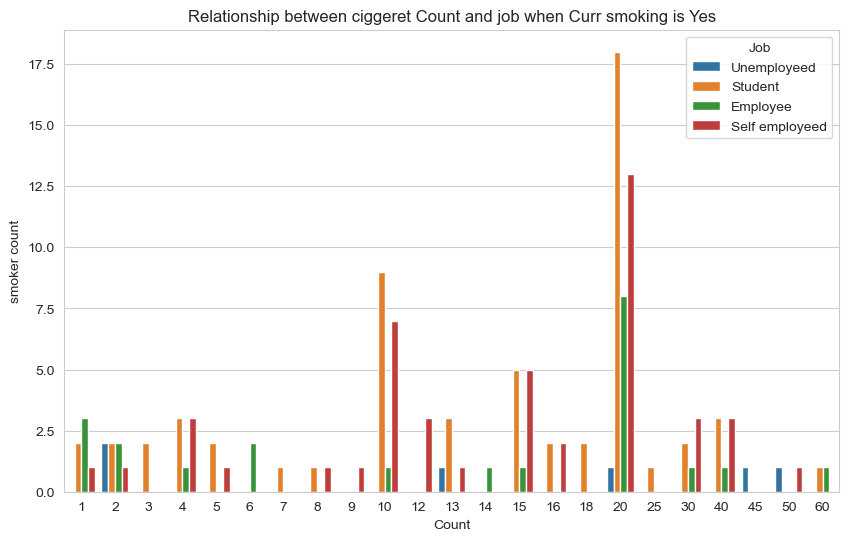

In [161]:
# Filter the data to include only rows where "curr smoking" is yes
yes_curr_smoking_data = data[data['Curr smoking'] == 'Yes']

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=yes_curr_smoking_data, x='count', hue='Job')

plt.title('Relationship between ciggeret Count and job when Curr smoking is Yes')
plt.xlabel('Count')
plt.ylabel('smoker count')
plt.show()

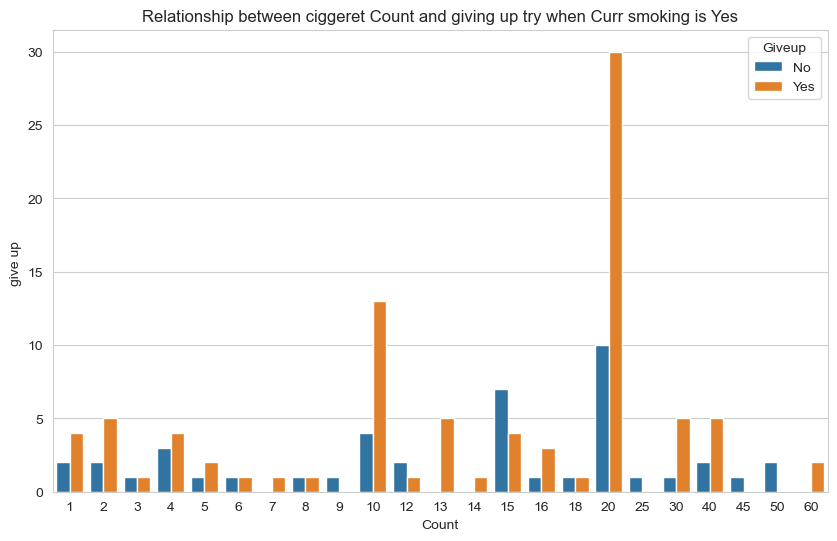

In [162]:
# Filter the data to include only rows where "curr smoking" is yes
yes_curr_smoking_data = data[data['Curr smoking'] == 'Yes']

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=yes_curr_smoking_data, x='count', hue='Giveup')

plt.title('Relationship between ciggeret Count and giving up try when Curr smoking is Yes')
plt.xlabel('Count')
plt.ylabel('give up ')
plt.show()

In [163]:
cross_tab = pd.crosstab(index=data['age'], columns=[data['Job'], data['Curr smoking']])
print(cross_tab)


Job          Employee     Self employeed     Student     Unemployeed    
Curr smoking       No Yes             No Yes      No Yes          No Yes
age                                                                     
16.5                1   0              0   2      16   6           1   0
22.0                8  11              9  25     117  51          17   5
30.0               10   9              8  17       2   2           5   1
40.0                2   2              0   2       0   0           0   0


In [164]:
cross_tab = pd.crosstab(index=data['Edu level'], columns=[data['age'], data['Curr smoking']])
print(cross_tab)


age               16.5     22.0     30.0     40.0    
Curr smoking        No Yes   No Yes   No Yes   No Yes
Edu level                                            
Elementary School    0   0    0   0    0   1    0   1
Higher education    10   1  135  79   18  25    1   2
Hight School         7   7   16   9    5   3    1   0
Middle School        1   0    0   4    2   0    0   1


In [165]:

# Convert age ranges to numeric values (midpoint)
def convert_age_range_to_numeric(x):
    if '+' in x:
        return int(x[:-1]) + 5  # Choose a suitable value for the upper limit
    else:
        return np.mean(list(map(int, x.split('-'))))


In [166]:

# Select relevant features
selected_features = ['age', 'Gender', 'Curr smoking', 'reasons', 'Edu level', 'Relative smokers', 'giveup', 'Job']
data = data[selected_features]

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Gender', 'Job'], drop_first=True)


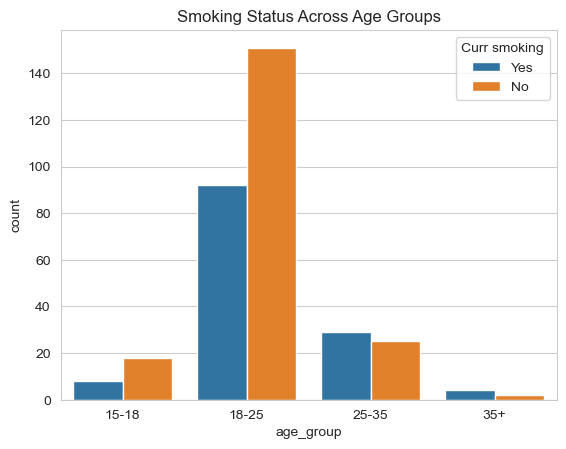

In [167]:

# Create age groups
age_bins = [15, 18, 25, 35, 100]
age_labels = ['15-18', '18-25', '25-35', '35+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Visualize smoking status across age groups
sns.countplot(x='age_group', hue='Curr smoking', data=data)
plt.title('Smoking Status Across Age Groups')
plt.show()


In [168]:

# Prepare data for model training
X = data[['age']]
y = data['Curr smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [169]:

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [170]:
y_pred = model.predict(X_test)

In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Logistic Regression model")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Logistic Regression model
Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

          No       0.65      0.88      0.75        41
         Yes       0.55      0.24      0.33        25

    accuracy                           0.64        66
   macro avg       0.60      0.56      0.54        66
weighted avg       0.61      0.64      0.59        66

[[36  5]
 [19  6]]


In [172]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

print("Decision Tree Model:")
print(f'Accuracy: {accuracy_score(y_test, dt_y_pred)}')
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))


Decision Tree Model:
Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

          No       0.65      0.88      0.75        41
         Yes       0.55      0.24      0.33        25

    accuracy                           0.64        66
   macro avg       0.60      0.56      0.54        66
weighted avg       0.61      0.64      0.59        66

[[36  5]
 [19  6]]


In [173]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict using Random Forest model
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
print("Random Forest Model:")
print(f'Accuracy: {accuracy_score(y_test, rf_y_pred)}')
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))


Random Forest Model:
Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

          No       0.65      0.88      0.75        41
         Yes       0.55      0.24      0.33        25

    accuracy                           0.64        66
   macro avg       0.60      0.56      0.54        66
weighted avg       0.61      0.64      0.59        66

[[36  5]
 [19  6]]
